<a href="https://colab.research.google.com/github/ScriptSherpa/demoprojects/blob/main/Breast_Cancer_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import os

In [17]:
df = pd.read_csv('/content/breast-cancer (1).csv')

In [18]:
num_features = len(df.columns[2:])
print(f'Number of Features: {num_features}')

Number of Features: 30


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
# check for any nan values
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [21]:
# check for duplicate rows
df.duplicated().sum()

0

Feature Engineering (Min-max Scaling)¶


In [22]:
# Minmax Scaling on Features

def MinMax(feature_data):
    """
    feature_data is a vector of data for a specific feature
    Data will range from 0-1
    """

    min_val = min(feature_data)
    max_val = max(feature_data)
    range = max_val - min_val

    # epsilon prevents divide by 0 error
    epsilon = 10**(-8)

    return (feature_data - min_val)/(range + epsilon)

In [23]:
# # Method 1
# for column in df.columns[2:]:
#     df[column] = MinMax(df[column])

# Method 2
# iloc selects all rows and only columns starting from 2nd index

# apply columnwise

df.iloc[:, 2:] = df.iloc[:, 2:].apply(MinMax, axis = 0)

# Check
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,842517,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,84300903,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431016,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,84348301,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,84358402,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,926682,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,926954,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,927241,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Logistic Regression
Obtainy true
  which is the vector of 0s and 1s corresponding to benign and malignant diagnosis' respectively.

In [24]:
# Method 1
y_true_1 = np.zeros(df.diagnosis.shape)
for idx, diagnosis in enumerate(df.diagnosis):
    if diagnosis == 'M':
        y_true_1[idx] = 1
    else:
        y_true_1[idx] = 0


# Method 2
# .values converes a pandas dataframe/series to a numpy array
y_true_2 = df.diagnosis.map({"M" : 1, "B" : 0}).values

# Method 3
y_true = np.where(df.diagnosis == "M", 1, 0)

In [25]:
# Check

print(y_true.shape)

print(y_true[15:22])
df.diagnosis[15:22]

(569,)
[1 1 1 1 0 0 0]


,diagnosis
15,M
16,M
17,M
18,M
19,B
20,B
21,B


Obtain  
x
  which is the input dataset. We need to remove unnecessary columns from the dataframe.

In [26]:
# Drop the id and diagnosis columns
# Obtain input dataset

# Method 1
df_input = df.drop(df.columns[:2], axis = 'columns')

# Method 2
#df = df.iloc[:, 1:]

# Check
df_input

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431016,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186815,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675252,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Split the dataset into training and validation sets.

70% training
30% validation

In [27]:

# Training and Validation Datasets
# 70% training
# 30% validation

N = len(df_input.radius_mean)
print(f'Total Number of Patients: {N}')

N_train = np.floor(N * 0.7).astype(int)
N_valid = N - N_train
print(f'Training Dataset Size: {N_train}')
print(f'Validation Dataset Size: {N_valid}')

# Split the dataset
df_train = df_input[:N_train]
df_valid = df_input[N_train:]

Total Number of Patients: 569
Training Dataset Size: 398
Validation Dataset Size: 171


Objective function is the negative log likelihood. We are doing MLE - we aim to find the values of the weights that minimise the objective function. Optimisiation done via gradient descent.

In [28]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# No bias term
# Can add a bias term by adding a feature into x that is always = 1
# Note, we are using mean NLL
def negative_log_likelihood(weights, x, y_true):
    z = np.dot(x, weights)
    phi = y_true * np.log(sigmoid(z)) + (1 - y_true) * (1 - np.log(sigmoid(z)))
    return -np.mean(phi)

def gradient(weights, x, y_true):
    z = np.dot(x, weights)
    sig_z = sigmoid(z)
    grad = np.dot(x.T, (sig_z - y_true)) / len(y_true)
    return grad

def sgd(x, y_true, weights, learning_rate, epochs):
    loss_list = []
    for epoch in range(epochs):
        grad = gradient(weights, x, y_true)

        weights -= learning_rate * grad
        if epoch % 50 == 0:
            loss = negative_log_likelihood(weights, x, y_true)
            loss_list.append(loss)
            print(f'Epoch [{epoch+1}/{epochs}],Loss: {loss:.4f}')
    return weights, loss_list

In [29]:
# Usually learning rate < 1
# Works here but not good practise
learning_rate = 1.5
epochs = 2500
init_weights = np.ones(num_features)
x = df_train.values
y_true_train = y_true[:N_train]
optimal_weights, loss_list = sgd(x, y_true_train, init_weights, learning_rate, epochs)

Epoch [1/2500],Loss: -0.5758
Epoch [51/2500],Loss: -1.1588
Epoch [101/2500],Loss: -1.3645
Epoch [151/2500],Loss: -1.4982
Epoch [201/2500],Loss: -1.5963
Epoch [251/2500],Loss: -1.6732
Epoch [301/2500],Loss: -1.7361
Epoch [351/2500],Loss: -1.7890
Epoch [401/2500],Loss: -1.8348
Epoch [451/2500],Loss: -1.8750
Epoch [501/2500],Loss: -1.9108
Epoch [551/2500],Loss: -1.9432
Epoch [601/2500],Loss: -1.9728
Epoch [651/2500],Loss: -2.0000
Epoch [701/2500],Loss: -2.0253
Epoch [751/2500],Loss: -2.0489
Epoch [801/2500],Loss: -2.0711
Epoch [851/2500],Loss: -2.0921
Epoch [901/2500],Loss: -2.1120
Epoch [951/2500],Loss: -2.1309
Epoch [1001/2500],Loss: -2.1490
Epoch [1051/2500],Loss: -2.1663
Epoch [1101/2500],Loss: -2.1829
Epoch [1151/2500],Loss: -2.1989
Epoch [1201/2500],Loss: -2.2143
Epoch [1251/2500],Loss: -2.2291
Epoch [1301/2500],Loss: -2.2435
Epoch [1351/2500],Loss: -2.2575
Epoch [1401/2500],Loss: -2.2710
Epoch [1451/2500],Loss: -2.2841
Epoch [1501/2500],Loss: -2.2969
Epoch [1551/2500],Loss: -2.3093

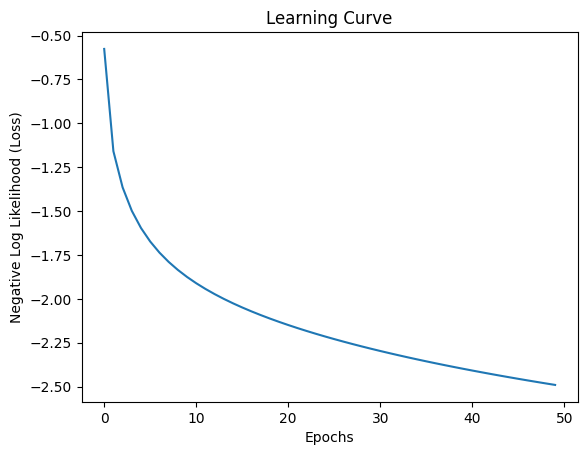

In [30]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Negative Log Likelihood (Loss)')
plt.title('Learning Curve')
plt.show()

In [31]:
## Validation
def predict(x, weights):
    z = np.dot(x, weights)
    y_pred = np.where(z > 0.5, 1, 0)
    return y_pred

x_valid = df_valid.values
y_true_valid = y_true[N_train:]
y_pred = predict(x_valid, optimal_weights)

# number of correct pred / total number of pred * 100
acc = np.mean(y_pred == y_true_valid) * 100
print(f'{acc}% accuracy in validation set')

97.07602339181285% accuracy in validation set


In [32]:
# Sanity Check

print(f' Predicted: \n {y_pred[:20]}')
print(f' True: \n {y_true_valid[:20]}')

# 0 means benign
# 1 means malignant

 Predicted: 
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 True: 
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1]
